<a href="https://colab.research.google.com/github/Adarsh-Saurabh/AI-Champ-/blob/main/Week_4_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download assets

In [1]:
!gdown --id 1yhGmBvOADs1Qzry8clonWlepbGkOj-PO
!unzip week4_assets.zip -d .

Downloading...
From: https://drive.google.com/uc?id=1yhGmBvOADs1Qzry8clonWlepbGkOj-PO
To: /content/week4_assets.zip
100% 256k/256k [00:00<00:00, 37.0MB/s]
Archive:  week4_assets.zip
  inflating: ./bg2.jpg               
  inflating: ./humans.jpg            
  inflating: ./logo.png              
  inflating: ./person.jpg            
  inflating: ./pizza_bluescreen.jpg  


# Background Change

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

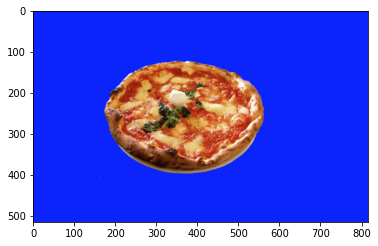

In [3]:
img = cv2.imread("pizza_bluescreen.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

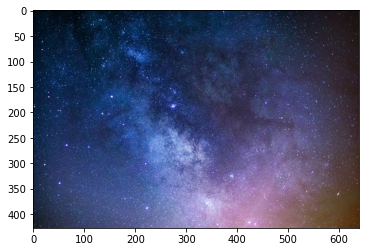

In [4]:
bg = cv2.imread("bg2.jpg")
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
plt.imshow(bg)

In [5]:
upper_green = (20, 40, 255)
lower_green = (0, 0, 0)

mask = cv2.inRange(img, lower_green, upper_green)

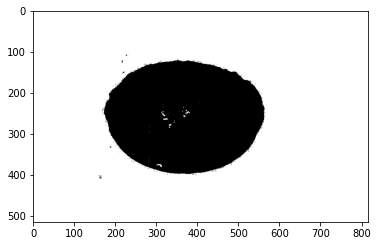

In [6]:
plt.imshow(mask, cmap='gray')

In [7]:
bg = cv2.resize(bg, (img.shape[1], img.shape[0]))

bg.shape, img.shape

((514, 816, 3), (514, 816, 3))

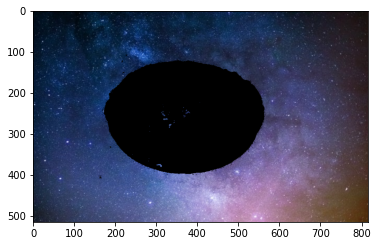

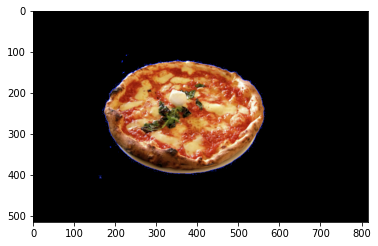

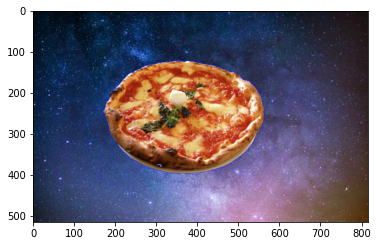

In [8]:
b = cv2.bitwise_and(bg, bg, mask=mask)
a = cv2.bitwise_and(img, img, mask=~mask)

plt.imshow(b)
plt.show()
plt.imshow(a)
plt.show()

final_image = cv2.add(a, b)
plt.imshow(final_image)
plt.show()

# Watermark

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

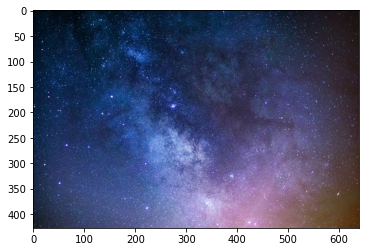

In [10]:
bg = cv2.imread("bg2.jpg")
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
plt.imshow(bg)

In [11]:
watermark = cv2.imread("logo.png", -1)
wh, ww, wc = watermark.shape


# plt.imshow(watermark[watermark==255])
print(watermark.shape)

(55, 114, 4)


(427, 640, 4)


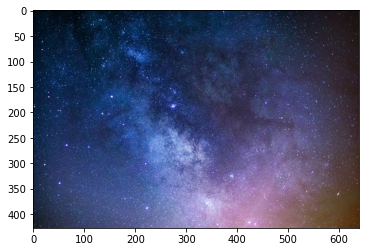

In [12]:
(h, w, c) = bg.shape
image = np.dstack([bg, np.full((h, w), 255)])
print(image.shape)
plt.imshow(image)

In [13]:
x1, y1 = 20, 20
x2, y2 = x1 + ww, y1 + wh

overlay = np.zeros_like(image)
overlay[y1:y2, x1:x2] = watermark

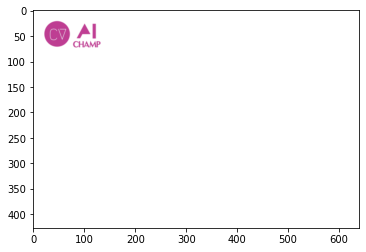

In [14]:
plt.imshow(overlay)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


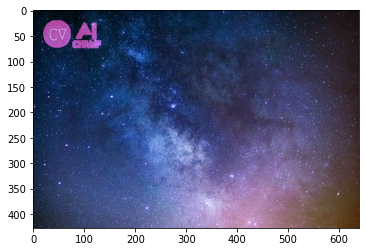

In [15]:
combined = image.copy()
combined = cv2.addWeighted(overlay, 0.9, combined, 1.0, 0.0)

plt.imsave("wt.png", combined.astype("uint8"))
plt.imshow(combined)

# Convert image to sketch

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

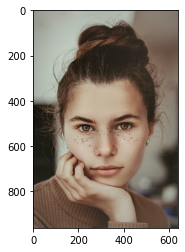

In [17]:
image = cv2.imread("person.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

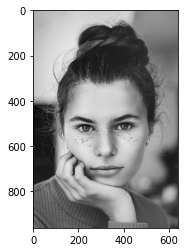

In [18]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray')

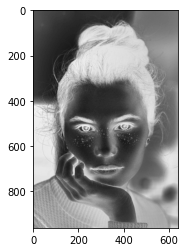

In [19]:
# image_gray_inv = 255 - image_gray
image_gray_inv = cv2.bitwise_not(image_gray)
plt.imshow(image_gray_inv, cmap='gray')

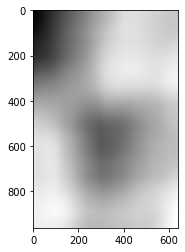

In [20]:
image_gray_inv_blur = cv2.blur(image_gray_inv, (400, 400))
plt.imshow(image_gray_inv_blur, cmap='gray')

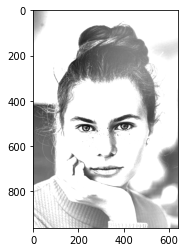

In [21]:
image_gray_inv_blur_divide = cv2.divide(image_gray_inv_blur, image_gray_inv, scale=256)
plt.imshow(image_gray_inv_blur_divide, cmap='gray')

# Face detection and blurring

In [22]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 5.5MB/s 


In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

%matplotlib inline

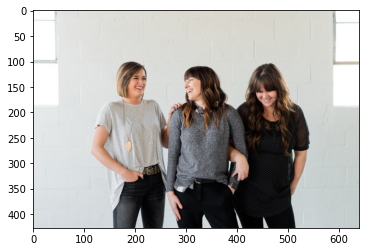

In [24]:
image = cv2.imread("humans.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [25]:
mtcnn = MTCNN()

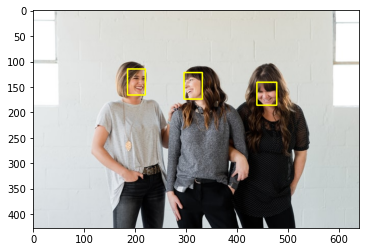

In [26]:
faces = mtcnn.detect_faces(image)
draw_rect = np.copy(image)

for face in faces:
    x, y, w, h = face['box']
    draw_rect = cv2.rectangle(draw_rect, (x, y), (x+w, y+h), (255, 255, 0), 2)

plt.imshow(draw_rect)

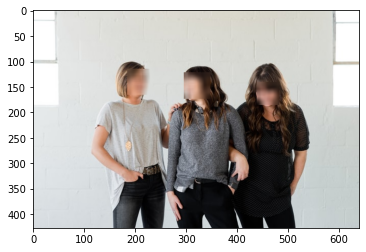

In [27]:
faces = mtcnn.detect_faces(image)
blurred = np.copy(image)

for face in faces:
    x, y, w, h = face['box']
    blurred[y:y+h, x:x+h] = cv2.blur(blurred[y:y+h, x:x+h], (15, 15))

plt.imshow(blurred)